**Marcus Woo**

**BrainStation**

**Spring 2022**


## Introduction

The Covid-19 Pandemic has placed a huge burden on societies and the health care system. Even though reported cases and Covid-related deaths are declining globally, and many countries are easing Covid-19 restrictions, there is still a considerable risk that there might be another pandemic wave. Being able to predict mortality risk among the infected individuals accurately and identifying severe cases early is important for prioritizing medical care and the planning of health resources.

    1. Apply machine learning methods to predict Covid-19 mortality risk using publicly available data
   
    2. Compare different machine learning methods and see which model provides the highest predictive accuracy


### Notebook 1: Data loading, Cleaning and EDA

This notebook focuses on data cleaning and Exploratory Data Analysis (EDA).

The dataset is downloaded from the City of Toronto's Open Data Portal - https://open.toronto.ca/dataset/covid-19-cases-in-toronto/. It is managed and published by Toronto Public Health. This dataset contains demographics, geographic, and hospitalization information for all confirmed and probable cases reported to Toronto Public Health since January 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset

covid_df = pd.read_csv('COVID19 cases.csv')

covid_df.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,5360306,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/1/22,2020/1/23,FEMALE,RESOLVED,No,No,No,No,No,No
1,5360307,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/1/21,2020/1/23,MALE,RESOLVED,No,No,No,Yes,No,No
2,5360308,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020/2/5,2020/2/21,FEMALE,RESOLVED,No,No,No,No,No,No
3,5360309,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020/2/16,2020/2/25,FEMALE,RESOLVED,No,No,No,No,No,No
4,5360310,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020/2/20,2020/2/26,MALE,RESOLVED,No,No,No,No,No,No


### Data Features Dictionary**

- `ID` : Unique row identifier for Open Data database

- `Assigned_ID`	: A unique ID assigned to cases by Toronto Public Health for the purposes of posting to Open Data, to allow for tracking of specific cases. 

- `Outbreak Associated` : Outbreak associated cases are associated with outbreaks of COVID-19 in Toronto healthcare institutions and healthcare settings (e.g. long-term care homes, retirement homes, hospitals, etc.) and other Toronto congregate settings (such as homeless shelters).

- `Age Group`: Age at time of illness. Age groups (in years): ≤19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90+, unknown (blank)

- `Neighbourhood Name` : Toronto is divided into 140 geographically distinct neighborhoods that were established to help government and community agencies with local planning by providing socio-economic data for a meaningful geographic area.
- `FSA`	Forward sortation area (i.e. first three characters of postal code) based on the case's primary home address. FSA values are generated from client postal codes. One FSA can span multiple neighbourhoods.

- `Source of Infection` : 	The most likely way that cases acquired their COVID-19 infection is determined by examining several data fields including:

- `Episode Date`: 	The episode date is a derived variable that best estimates when the disease was acquired, and refers to the earliest available date from: symptom onset (the first day that COVID-19 symptoms occurred), laboratory specimen collection date, or reported date.

- `Reported Date` : 	The date on which the case was reported to Toronto Public Health.

- `Client Gender` :	Self-reported gender. Gender is a system that operates in a social context and generally classifies people based on their assigned biological sex.

- `Outcome` 	
        - Fatal: Any case that has died and has been marked as Outcome equals 'Fatal'
        - Resolved: case outcome description of Recovered
        - Active: All other cases

- `Currently Hospitalized` :	Cases that are currently admitted to hospital (i.e., no discharge date reported).

- `Currently in ICU` :	Cases that are currently admitted to the intensive care unit (ICU) (i.e. no discharge date reported).

- `Currently Intubated`:	Cases that were intubated related to their COVID-19 infection (includes cases that are currently intubated and those that have been discharged or deceased).

- `Ever Hospitalized` :	Cases that were hospitalized related to their COVID-19 infection (includes cases that are currently hospitalized and those that have been discharged or are deceased).

- `Ever in ICU`: 	Cases that were admitted to the intensive care unit (ICU) related to their COVID-19 infection (includes cases that are currently in ICU and those that have been discharged or are deceased).

- `Ever Intubated`:	Cases that were intubated related to their COVID-19 infection (includes cases that are currently intubated and those that have been discharged or deceased)


Please refer to __[this link](http://open.toronto.ca/dataset/covid-19-cases-in-toronto/)__ for more information under the section `Data Features`.

In [3]:
#rows and columns
covid_df.shape

print(f' The covid dataset has {covid_df.shape[0]} rows and {covid_df.shape[1]} columns')

 The covid dataset has 277473 rows and 18 columns


### MIssing Values

In [4]:
#check null values and the proportion 
covid_df.isnull().sum() / covid_df.shape[0]

_id                       0.000000
Assigned_ID               0.000000
Outbreak Associated       0.000000
Age Group                 0.000706
Neighbourhood Name        0.023008
FSA                       0.011151
Source of Infection       0.000000
Classification            0.000000
Episode Date              0.000000
Reported Date             0.000000
Client Gender             0.000000
Outcome                   0.000000
Currently Hospitalized    0.000000
Currently in ICU          0.000000
Currently Intubated       0.000000
Ever Hospitalized         0.000000
Ever in ICU               0.000000
Ever Intubated            0.000000
dtype: float64

- **`Neighbour Name`**: 2.3% of data is missing
- **`FSA`**: 1.1% of data is missing
- **`Age`**: 0.07% of data is missing

I also gathered census data on Pre-Tax Household Income and Population Density from __[Wellbeing Toronto](https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/wellbeing-toronto/)__ based on the 140 Neighbourhoods in Toronto. Wellbeing Toronto is a map application that contains datasets and information on demographics, and housing, economic factors that are available to the public.

In [5]:
# load the dataset with census data on Pre-Tax Household Income and Population Density
demographics_df = pd.read_csv('wellbeing_toronto.csv')

demographics_df.head()

,Neighbourhood Name,Neighbourhood Id,Pre-Tax Household Income,Population density per square kilometre
0,Agincourt North,129,60162,"3,929"
1,Agincourt South-Malvern West,128,59013,"3,034"
2,Alderwood,20,71585,"2,435"
3,Annex,95,57825,"10,863"
4,Banbury-Don Mills,42,70039,"2,775"


In [6]:
#check the unique values of neighbourhood
covid_df['Neighbourhood Name'].nunique()

140

In [7]:
#check the unique values of neighbourhood
demographics_df['Neighbourhood Name'].nunique()

140

Even though the number of unique values matches for `Neighbourhood Name ` matched when I merged two datasets together on `Neighbourhood Name`, it returned 145 unique neighborhood names, so some of the spellings do not match. I will need to create a function to return all unmatched neighborhood names, then correct the spelling of the neighborhood names

In [8]:
#get unique values of neighbourhood names from covid_df
list_a = covid_df['Neighbourhood Name'].unique()

list_a = list_a.tolist()

In [9]:
#get unique values of neighbourhood names from demographics_df
list_b = demographics_df['Neighbourhood Name'].unique()

list_b = list_b.tolist()

In [10]:
def return_unmatched(list_a, list_b):
    """
    Compare the two lists of unique values and return unmatched value

    """
    non_match_a  = set(list_a)-set(list_b)
    non_match_b  = set(list_b)-set(list_a)
    non_match = list(non_match_a) + list(non_match_b)
    return non_match

In [11]:
return_unmatched(list_a,list_b)

[nan,
 'Cabbagetown-South St. James Town',
 'North St. James Town',
 'Dovercourt-Wallace Emerson-Junction',
 'Briar Hill - Belgravia',
 'Mimico (includes Humber Bay Shores)',
 'Cabbagetown-South St.James Town',
 'North St.James Town',
 'Dovercourt-Wallace Emerson-Juncti',
 'Briar Hill-Belgravia',
 'Mimico']

In [12]:
#match and replace the five neighbourhood names
covid_df['Neighbourhood Name'].replace('North St. James Town', 'North St.James Town',inplace = True)
covid_df['Neighbourhood Name'].replace('Briar Hill - Belgravia', 'Briar Hill-Belgravia',inplace = True)
covid_df['Neighbourhood Name'].replace('Dovercourt-Wallace Emerson-Junction', 'Dovercourt-Wallace Emerson-Juncti',inplace = True)
covid_df['Neighbourhood Name'].replace('Cabbagetown-South St. James Town', 'Cabbagetown-South St.James Town',inplace = True)
covid_df['Neighbourhood Name'].replace('Mimico (includes Humber Bay Shores)', 'Mimico',inplace = True)

In [13]:
# Merge the two dataset based on 'Neighbourhood Name'
combined_df = pd.merge(covid_df, demographics_df, on='Neighbourhood Name')

In [14]:
#sanity check
combined_df['Neighbourhood Name'].nunique()

140

In [15]:
combined_df.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,...,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,Neighbourhood Id,Pre-Tax Household Income,Population density per square kilometre
0,5360306,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/1/22,2020/1/23,...,RESOLVED,No,No,No,No,No,No,51,64362,"10,087"
1,5360307,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/1/21,2020/1/23,...,RESOLVED,No,No,No,Yes,No,No,51,64362,"10,087"
2,5360314,9,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/2/29,2020/2/29,...,RESOLVED,No,No,No,No,No,No,51,64362,"10,087"
3,5360321,16,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/3/3,2020/3/5,...,RESOLVED,No,No,No,No,No,No,51,64362,"10,087"
4,5360325,21,Sporadic,80 to 89 Years,Willowdale East,M2N,Travel,CONFIRMED,2020/3/3,2020/3/8,...,RESOLVED,No,No,No,No,No,No,51,64362,"10,087"


In [16]:
# Explore the dataset
combined_df.shape

print(f'The combined dataset now has {combined_df.shape[0]} rows and {combined_df.shape[1]} columns')

The combined dataset now has 271089 rows and 21 columns


I merged the two datasets and performed an inner join, so all the rows with missing values for `Neighbourhood name` are removed. 6385 (~ 2%)  rows of data were removed.

In [17]:
#check for null values
combined_df.isnull().sum()

_id                                          0
Assigned_ID                                  0
Outbreak Associated                          0
Age Group                                  127
Neighbourhood Name                           0
FSA                                          0
Source of Infection                          0
Classification                               0
Episode Date                                 0
Reported Date                                0
Client Gender                                0
Outcome                                      0
Currently Hospitalized                       0
Currently in ICU                             0
Currently Intubated                          0
Ever Hospitalized                            0
Ever in ICU                                  0
Ever Intubated                               0
Neighbourhood Id                             0
Pre-Tax Household Income                     0
Population density per square kilometre      0
dtype: int64

There are 127 missing values for `Age Group`, which is less than 0.1% of total observations and I noticed `Age Group` is a categorical variable, so we can not replace the missing values with mean or median.

In [18]:
#drop rows with null values
combined_df.dropna(axis = 0, inplace = True)

#sanity check
combined_df.isnull().sum()

_id                                        0
Assigned_ID                                0
Outbreak Associated                        0
Age Group                                  0
Neighbourhood Name                         0
FSA                                        0
Source of Infection                        0
Classification                             0
Episode Date                               0
Reported Date                              0
Client Gender                              0
Outcome                                    0
Currently Hospitalized                     0
Currently in ICU                           0
Currently Intubated                        0
Ever Hospitalized                          0
Ever in ICU                                0
Ever Intubated                             0
Neighbourhood Id                           0
Pre-Tax Household Income                   0
Population density per square kilometre    0
dtype: int64

### Duplicated rows

In [19]:
# check for duplicated row
combined_df.duplicated().sum()

0

In [20]:
#check datatypes for each variable
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270962 entries, 0 to 271088
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   _id                                      270962 non-null  int64 
 1   Assigned_ID                              270962 non-null  int64 
 2   Outbreak Associated                      270962 non-null  object
 3   Age Group                                270962 non-null  object
 4   Neighbourhood Name                       270962 non-null  object
 5   FSA                                      270962 non-null  object
 6   Source of Infection                      270962 non-null  object
 7   Classification                           270962 non-null  object
 8   Episode Date                             270962 non-null  object
 9   Reported Date                            270962 non-null  object
 10  Client Gender                            270

Some of these columns are not useful for our analysis or it carries redundant information, such as '_id', 'Assigned_ID', 'Neighbourhood Name', 'FSA', 'Currently Hospitalized', 'Currently in ICU', 'Currently Intubated'.

-Our target variable is `Outcome`, whether the person recovered or passed away, so we are not interested in the patient's current condition.

-We have acquired `population density` and `household income` data using neighborhood information, so we can remove `Neighbourhood Name` and `FSA`. 

In [21]:
#drop columns
combined_clean_df = combined_df.drop(columns = ['_id', 'Assigned_ID', 'Neighbourhood Name', 'FSA', 'Reported Date', 'Currently Hospitalized', 'Currently in ICU', 'Currently Intubated','Neighbourhood Id'])

combined_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270962 entries, 0 to 271088
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Outbreak Associated                      270962 non-null  object
 1   Age Group                                270962 non-null  object
 2   Source of Infection                      270962 non-null  object
 3   Classification                           270962 non-null  object
 4   Episode Date                             270962 non-null  object
 5   Client Gender                            270962 non-null  object
 6   Outcome                                  270962 non-null  object
 7   Ever Hospitalized                        270962 non-null  object
 8   Ever in ICU                              270962 non-null  object
 9   Ever Intubated                           270962 non-null  object
 10  Pre-Tax Household Income                 270

### Exploratory Data Analysis EDA

In [22]:
#start with our dependent variable
combined_clean_df['Outcome'].value_counts()

RESOLVED    259009
ACTIVE        7932
FATAL         4021
Name: Outcome, dtype: int64

I will combine `Resolved` and `Active` cases together since we are trying to predict Covid19 mortality risk, so we can simply look at fatal cases with non-fatal cases and treat this as a binary classification task.

In [23]:
#map fatal cases to 1 and others to 0
combined_clean_df['Outcome'] = np.where(combined_clean_df['Outcome'] == 'FATAL', 'FATAL', 'RESOLVED')

#sanity check
combined_clean_df['Outcome'].value_counts()

RESOLVED    266941
FATAL         4021
Name: Outcome, dtype: int64

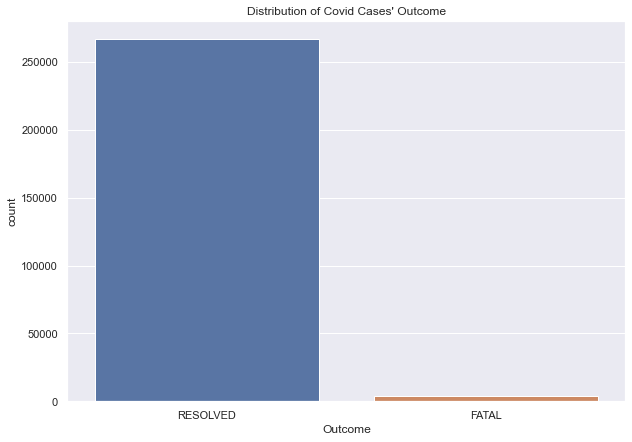

In [24]:
#plot dependent variables
sns.set()
plt.figure(figsize=(10,7))

sns.countplot(data = combined_clean_df, x = 'Outcome')
plt.title("Distribution of Covid Cases' Outcome")

#plt.savefig('Class_imbalance.pdf', dpi = 400) #export graph fpr powerpoint presentation
plt.show()


**We definitely see a huge imbalance between the two classes with 4021 `Fatal` cases and 266941 `Resolved` cases.**

In [25]:
#convert population density variable to int by removing ','
combined_clean_df['Population density per square kilometre'] = combined_clean_df['Population density per square kilometre'].str.replace(',','').astype(int)

In [26]:
# create a list for numeric variables
numeric_column = list(combined_clean_df.select_dtypes("number").columns)

numeric_df = combined_clean_df[numeric_column]

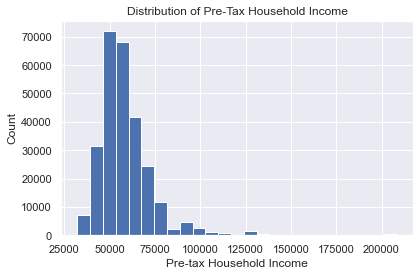

In [27]:
#plot histograms for numeric variables
plt.figure()

combined_clean_df['Pre-Tax Household Income'].hist(bins = 25)
plt.title('Distribution of Pre-Tax Household Income')
plt.xlabel('Pre-tax Household Income')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

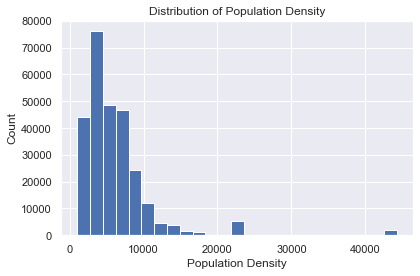

In [28]:
#plot histograms for numeric variables
plt.figure()

combined_clean_df['Population density per square kilometre'].hist(bins = 25)
plt.title('Distribution of Population Density')
plt.xlabel('Population Density')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

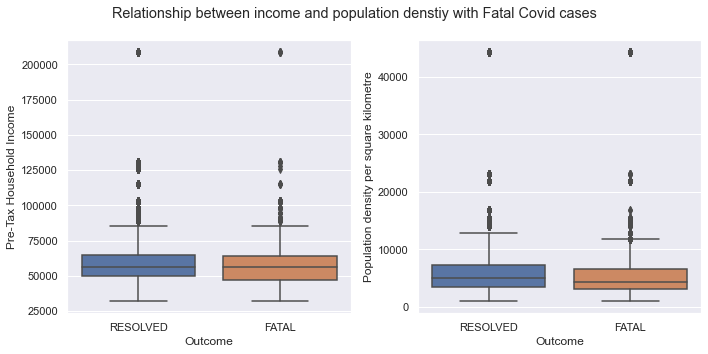

In [29]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Relationship between income and population denstiy with Fatal Covid cases')

sns.boxplot(y='Pre-Tax Household Income', x='Outcome', data=combined_clean_df, ax=axes[0])

sns.boxplot(y='Population density per square kilometre', x='Outcome', data=combined_clean_df, ax=axes[1])

plt.tight_layout()

Initially, I was hoping to see a difference in mortality rates among those with higher and lower incomes. Often it has been reported that communities with fewer resources are suffering from more cases and deaths. especially when we are comparing developed and developing countries, or looking at rich and poor areas within a country. We are not able to see much of a difference here, perhaps because our dataset only consists of cases from the city of Toronto.

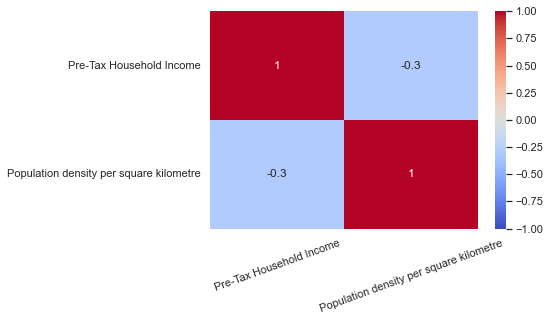

In [30]:
#plot correlation between the two numeric variables
plt.figure()

sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

plt.xticks(rotation = 20)

plt.show()

`Population Density` is negatively correlated with `Household Income`, Household with higher income tends to live in neighborhoods with lower population density.

In [31]:
def plot_fatal_ratio(df, column):
    """ 
    Plot the given categorical column against the outcome status in the data to show the distribution
    
    df is the dataframe and column is the name of the column.
    
    """

    total_count = df.groupby([column, "Outcome"])[column].count()
    pct_fatal = total_count / df.groupby(column)[column].count()
    
    total_count = total_count.unstack()
    pct_fatal = pct_fatal.unstack()
    
    display(df[column].value_counts())
    display(total_count)
    display(pct_fatal)

    pct_fatal.plot(kind = 'barh', stacked = True)
    plt.xlabel('Proportion')
    sns.despine()
    plt.title(f'{column} vs. outcome')
    plt.show()

In [32]:
#re-map fatal cases to 1 and others to 0
combined_clean_df['Outcome'] = np.where(combined_clean_df['Outcome'] == 'FATAL', 'ZFATAL', 'RESOLVED') #re-map fatal as zfatal for labelencoding

Sporadic               242250
Outbreak Associated     28712
Name: Outbreak Associated, dtype: int64

Outcome,RESOLVED,ZFATAL
Outbreak Associated,,
Outbreak Associated,26682,2030
Sporadic,240259,1991


Outcome,RESOLVED,ZFATAL
Outbreak Associated,,
Outbreak Associated,0.929298,0.070702
Sporadic,0.991781,0.008219


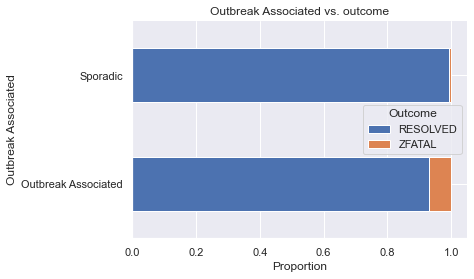

In [33]:
plot_fatal_ratio(combined_clean_df,'Outbreak Associated')

Outbreak associated cases have a higher number of fatal cases. These are cases that are associated with outbreaks of COVID-19 in Toronto healthcare institutions and healthcare settings (e.g. long-term care homes, retirement homes, hospitals, etc.) and other Toronto congregate settings (such as homeless shelters).

CONFIRMED    262163
PROBABLE       8799
Name: Classification, dtype: int64

Outcome,RESOLVED,ZFATAL
Classification,,
CONFIRMED,258191,3972
PROBABLE,8750,49


Outcome,RESOLVED,ZFATAL
Classification,,
CONFIRMED,0.984849,0.015151
PROBABLE,0.994431,0.005569


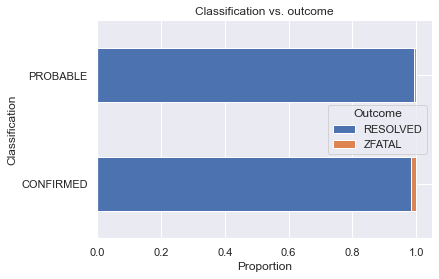

In [34]:
#classification column
plot_fatal_ratio(combined_clean_df, 'Classification')

We see a similar proportion of fatal cases among the two `classification` categories. Confirmed: a case that is laboratory confirmed, whereas a Probably case is where the person meets clinical criteria and epidemiologic linkage but with no confirmatory laboratory testing. This feature doesn't really carry much valuable information for us.

Click the link below that refers to the Ontario Ministry of Health website for Ontario's current provincial case definitions.
https://www.health.gov.on.ca/en/pro/programs/publichealth/coronavirus/docs/2019_case_definition.pdf

Next, I will look at the three variables that describe the history of hospitalization for Covid-19 (`Ever Hospitalizaed`, `Ever in ICU`, `Ever Intubated`). These three variables may be intermediate outcomes between infection and death, or they serve as proxies for a patient's underlying health condition. Very likely, we will see a high number of deceased cases among those who have been hospitalized. 

No     257784
Yes     13178
Name: Ever Hospitalized, dtype: int64

Outcome,RESOLVED,ZFATAL
Ever Hospitalized,,
No,256438,1346
Yes,10503,2675


Outcome,RESOLVED,ZFATAL
Ever Hospitalized,,
No,0.994779,0.005221
Yes,0.797010,0.202990


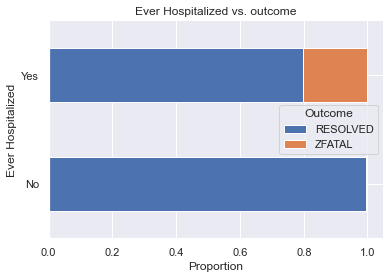

In [35]:
#ever hospitalized variable
plot_fatal_ratio(combined_clean_df, 'Ever Hospitalized')

There is a higher number of fatal cases among those who were hospitalized related to their COVID-19 infection.

No     268437
Yes      2525
Name: Ever in ICU, dtype: int64

Outcome,RESOLVED,ZFATAL
Ever in ICU,,
No,265417,3020
Yes,1524,1001


Outcome,RESOLVED,ZFATAL
Ever in ICU,,
No,0.988750,0.011250
Yes,0.603564,0.396436


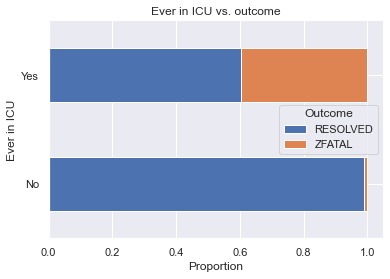

In [36]:
plot_fatal_ratio(combined_clean_df,'Ever in ICU')

No     269477
Yes      1485
Name: Ever Intubated, dtype: int64

Outcome,RESOLVED,ZFATAL
Ever Intubated,,
No,266194,3283
Yes,747,738


Outcome,RESOLVED,ZFATAL
Ever Intubated,,
No,0.987817,0.012183
Yes,0.503030,0.496970


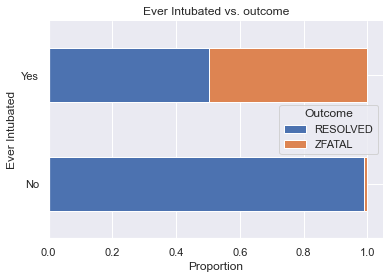

In [37]:
plot_fatal_ratio(combined_clean_df, 'Ever Intubated')

FEMALE                        138728
MALE                          130131
UNKNOWN                         1916
NON-BINARY                       122
TRANSGENDER                       21
TRANS MAN                         19
OTHER                             13
TRANS WOMAN                       10
NOT LISTED, PLEASE SPECIFY         2
Name: Client Gender, dtype: int64

Outcome,RESOLVED,ZFATAL
Client Gender,,
FEMALE,136871.0,1857.0
MALE,128018.0,2113.0
NON-BINARY,122.0,NaN
"NOT LISTED, PLEASE SPECIFY",2.0,NaN
OTHER,13.0,NaN
TRANS MAN,19.0,NaN
TRANS WOMAN,10.0,NaN
TRANSGENDER,21.0,NaN
UNKNOWN,1865.0,51.0


Outcome,RESOLVED,ZFATAL
Client Gender,,
FEMALE,0.986614,0.013386
MALE,0.983763,0.016237
NON-BINARY,1.000000,NaN
"NOT LISTED, PLEASE SPECIFY",1.000000,NaN
OTHER,1.000000,NaN
TRANS MAN,1.000000,NaN
TRANS WOMAN,1.000000,NaN
TRANSGENDER,1.000000,NaN
UNKNOWN,0.973382,0.026618


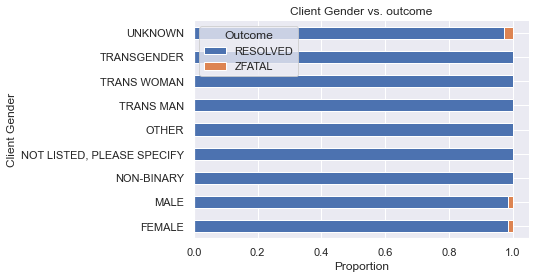

In [38]:
# Gender
plot_fatal_ratio(combined_clean_df, 'Client Gender')

We do see 9 different unique values for `Client Gender`, I can group all the other categories of gender like `transgender`, and `unknown` as `Other`. The `other` category of gender adds up to ~ 2000 rows and we can see that the `FATAL` cases are all under the `unknown` category.

In [39]:
# selecting all the rows with all the other category and grouping them together.
combined_clean_df.loc[(combined_clean_df['Client Gender'] != 'MALE') & (combined_clean_df['Client Gender'] != 'FEMALE'), 'Client Gender'] = 'Other'

In [40]:
#sanity check
combined_clean_df['Client Gender'].value_counts()

FEMALE    138728
MALE      130131
Other       2103
Name: Client Gender, dtype: int64

20 to 29 Years    57571
30 to 39 Years    50774
19 and younger    41599
40 to 49 Years    39179
50 to 59 Years    36055
60 to 69 Years    22164
70 to 79 Years    10966
80 to 89 Years     8168
90 and older       4486
Name: Age Group, dtype: int64

Outcome,RESOLVED,ZFATAL
Age Group,,
19 and younger,41596,3
20 to 29 Years,57560,11
30 to 39 Years,50741,33
40 to 49 Years,39102,77
50 to 59 Years,35849,206
60 to 69 Years,21669,495
70 to 79 Years,10175,791
80 to 89 Years,6821,1347
90 and older,3428,1058


Outcome,RESOLVED,ZFATAL
Age Group,,
19 and younger,0.999928,0.000072
20 to 29 Years,0.999809,0.000191
30 to 39 Years,0.999350,0.000650
40 to 49 Years,0.998035,0.001965
50 to 59 Years,0.994287,0.005713
60 to 69 Years,0.977666,0.022334
70 to 79 Years,0.927868,0.072132
80 to 89 Years,0.835088,0.164912
90 and older,0.764155,0.235845


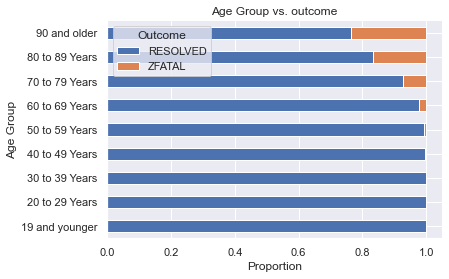

In [41]:
#Age Group
plot_fatal_ratio(combined_clean_df, 'Age Group')

There are more fatal cases among older age group. The risk of severe illness or mortality risk increase as people get older.

No Information                        115456
Community                              62896
Household Contact                      36316
Outbreaks, Healthcare Institutions     15401
Close Contact                          15219
Outbreaks, Other Settings              10218
Pending                                 8042
Outbreaks, Congregate Settings          3716
Travel                                  3698
Name: Source of Infection, dtype: int64

Outcome,RESOLVED,ZFATAL
Source of Infection,,
Close Contact,15084,135
Community,61940,956
Household Contact,36099,217
No Information,114833,623
"Outbreaks, Congregate Settings",3686,30
"Outbreaks, Healthcare Institutions",13434,1967
"Outbreaks, Other Settings",10167,51
Pending,8029,13
Travel,3669,29


Outcome,RESOLVED,ZFATAL
Source of Infection,,
Close Contact,0.991130,0.008870
Community,0.984800,0.015200
Household Contact,0.994025,0.005975
No Information,0.994604,0.005396
"Outbreaks, Congregate Settings",0.991927,0.008073
"Outbreaks, Healthcare Institutions",0.872281,0.127719
"Outbreaks, Other Settings",0.995009,0.004991
Pending,0.998383,0.001617
Travel,0.992158,0.007842


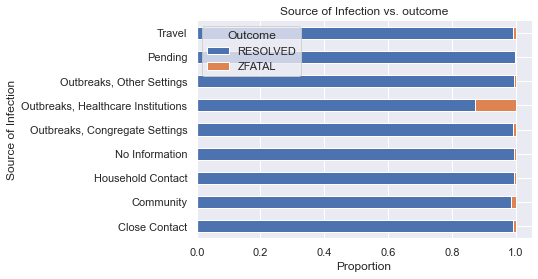

In [42]:
# Source of infection
plot_fatal_ratio(combined_clean_df, 'Source of Infection')

We do see a very high proportion of fatal cases among outbreaks in Health Care Institutions, however, we also have a lot of rows of data (~40% of total)with `no information`, so this feature might not be very useful for our analysis. 

In [63]:
#export merged dataset to csv
combined_clean_df.to_csv('final_dataset.csv')

In our next notebook, I will perform data transformation and apply different machine learning methods.

**-- >Notebook 2 Modeling and Model Evaluation**